In [1]:
import pandas as pd
import pandas_datareader as pdr

start = '2015-01-01'
end = '2019-12-31'

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
# Plot correlation

# Get stock data using lists. ^GSPC is S&P 500 price
stock_name_list = ['NFLX', 'TSLA', 'GOOG', 'AAPL', 'MSFT', 'AMZN', 'FB', '^GSPC'] 

stock_price_dict = {} 
adj_close_df = pd.DataFrame()

In [3]:
for i, stock_name in enumerate(stock_name_list): 
# i gets numbers assigned and stock_name gets names from the stock_name_list
  print(i,': ', stock_name)
  stock_price_dict[i] = pdr.data.DataReader(stock_name, 'yahoo', start, end)
  adj_close_df[stock_name] = stock_price_dict[i]['Adj Close'].values

0 :  NFLX
1 :  TSLA
2 :  GOOG
3 :  AAPL
4 :  MSFT
5 :  AMZN
6 :  FB
7 :  ^GSPC


In [4]:
adj_close_df

,NFLX,TSLA,GOOG,AAPL,MSFT,AMZN,FB,^GSPC
0,49.848572,219.309998,523.373108,99.766006,41.647892,308.519989,78.449997,2058.199951
1,47.311428,210.089996,512.463013,96.955429,41.264908,302.190002,77.190002,2020.579956
2,46.501427,211.279999,500.585632,96.964584,40.659245,295.290009,76.150002,2002.609985
3,46.742859,210.949997,499.727997,98.324242,41.175831,298.420013,76.150002,2025.900024
4,47.779999,210.619995,501.303680,102.102089,42.387146,300.459991,78.180000,2062.139893
...,...,...,...,...,...,...,...,...
1253,333.200012,425.250000,1343.560059,282.322266,156.137955,1789.209961,205.119995,3223.379883
1254,332.630005,430.940002,1360.400024,287.923645,157.417786,1868.770020,207.789993,3239.909912
1255,329.089996,430.380005,1351.890015,287.814392,157.705505,1869.800049,208.100006,3240.020020
1256,323.309998,414.700012,1336.140015,289.522614,156.346298,1846.890015,204.410004,3221.290039


In [5]:
# Get correlation using corr function

adj_close_df.corr()

,NFLX,TSLA,GOOG,AAPL,MSFT,AMZN,FB,^GSPC
NFLX,1.000000,0.497748,0.909916,0.854713,0.898029,0.968975,0.840469,0.911367
TSLA,0.497748,1.000000,0.587514,0.564509,0.432066,0.479285,0.602116,0.574073
GOOG,0.909916,0.587514,1.000000,0.899954,0.936682,0.957094,0.944910,0.955481
AAPL,0.854713,0.564509,0.899954,1.000000,0.939482,0.895291,0.827991,0.959302
MSFT,0.898029,0.432066,0.936682,0.939482,1.000000,0.953185,0.857030,0.960347
AMZN,0.968975,0.479285,0.957094,0.895291,0.953185,1.000000,0.881763,0.950964
FB,0.840469,0.602116,0.944910,0.827991,0.857030,0.881763,1.000000,0.912786
^GSPC,0.911367,0.574073,0.955481,0.959302,0.960347,0.950964,0.912786,1.000000


In [6]:
# Get correlation with color pattern
adj_close_corr = adj_close_df.corr()
adj_close_corr.style.background_gradient(cmap='coolwarm')

,NFLX,TSLA,GOOG,AAPL,MSFT,AMZN,FB,^GSPC
NFLX,1.000000,0.497748,0.909916,0.854713,0.898029,0.968975,0.840469,0.911367
TSLA,0.497748,1.000000,0.587514,0.564509,0.432066,0.479285,0.602116,0.574073
GOOG,0.909916,0.587514,1.000000,0.899954,0.936682,0.957094,0.944910,0.955481
AAPL,0.854713,0.564509,0.899954,1.000000,0.939482,0.895291,0.827991,0.959302
MSFT,0.898029,0.432066,0.936682,0.939482,1.000000,0.953185,0.857030,0.960347
AMZN,0.968975,0.479285,0.957094,0.895291,0.953185,1.000000,0.881763,0.950964
FB,0.840469,0.602116,0.944910,0.827991,0.857030,0.881763,1.000000,0.912786
^GSPC,0.911367,0.574073,0.955481,0.959302,0.960347,0.950964,0.912786,1.000000


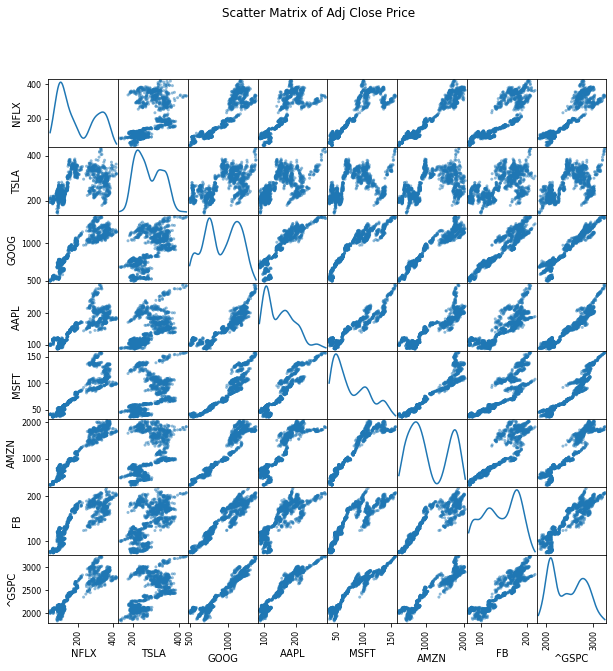

In [23]:
import matplotlib.pyplot as plt

pd.plotting.scatter_matrix(adj_close_df, figsize=(10,10), alpha=0.5, diagonal='kde')
plt.suptitle('Scatter Matrix of Adj Close Price')
plt.show()

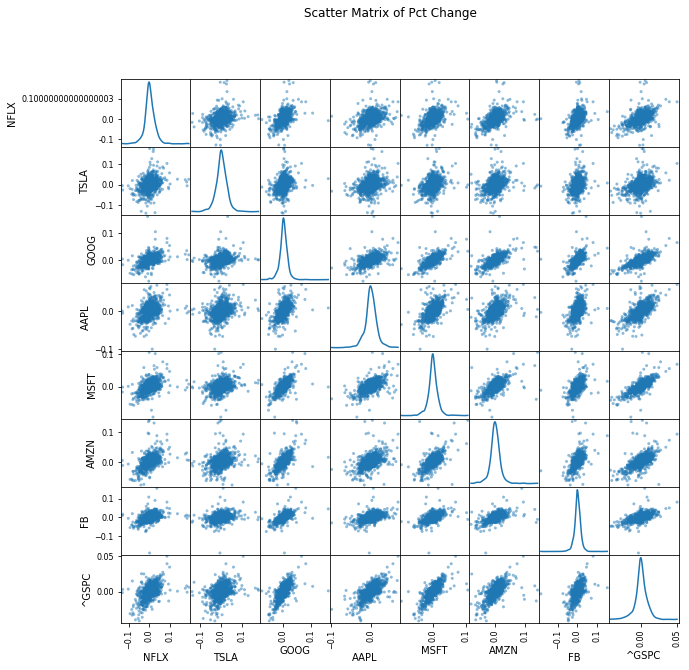

In [24]:
adj_close_pct_change = adj_close_df.pct_change()
pd.plotting.scatter_matrix(adj_close_pct_change, figsize=(10,10), alpha=0.5, diagonal='kde')
plt.suptitle('Scatter Matrix of Pct Change')
plt.show()

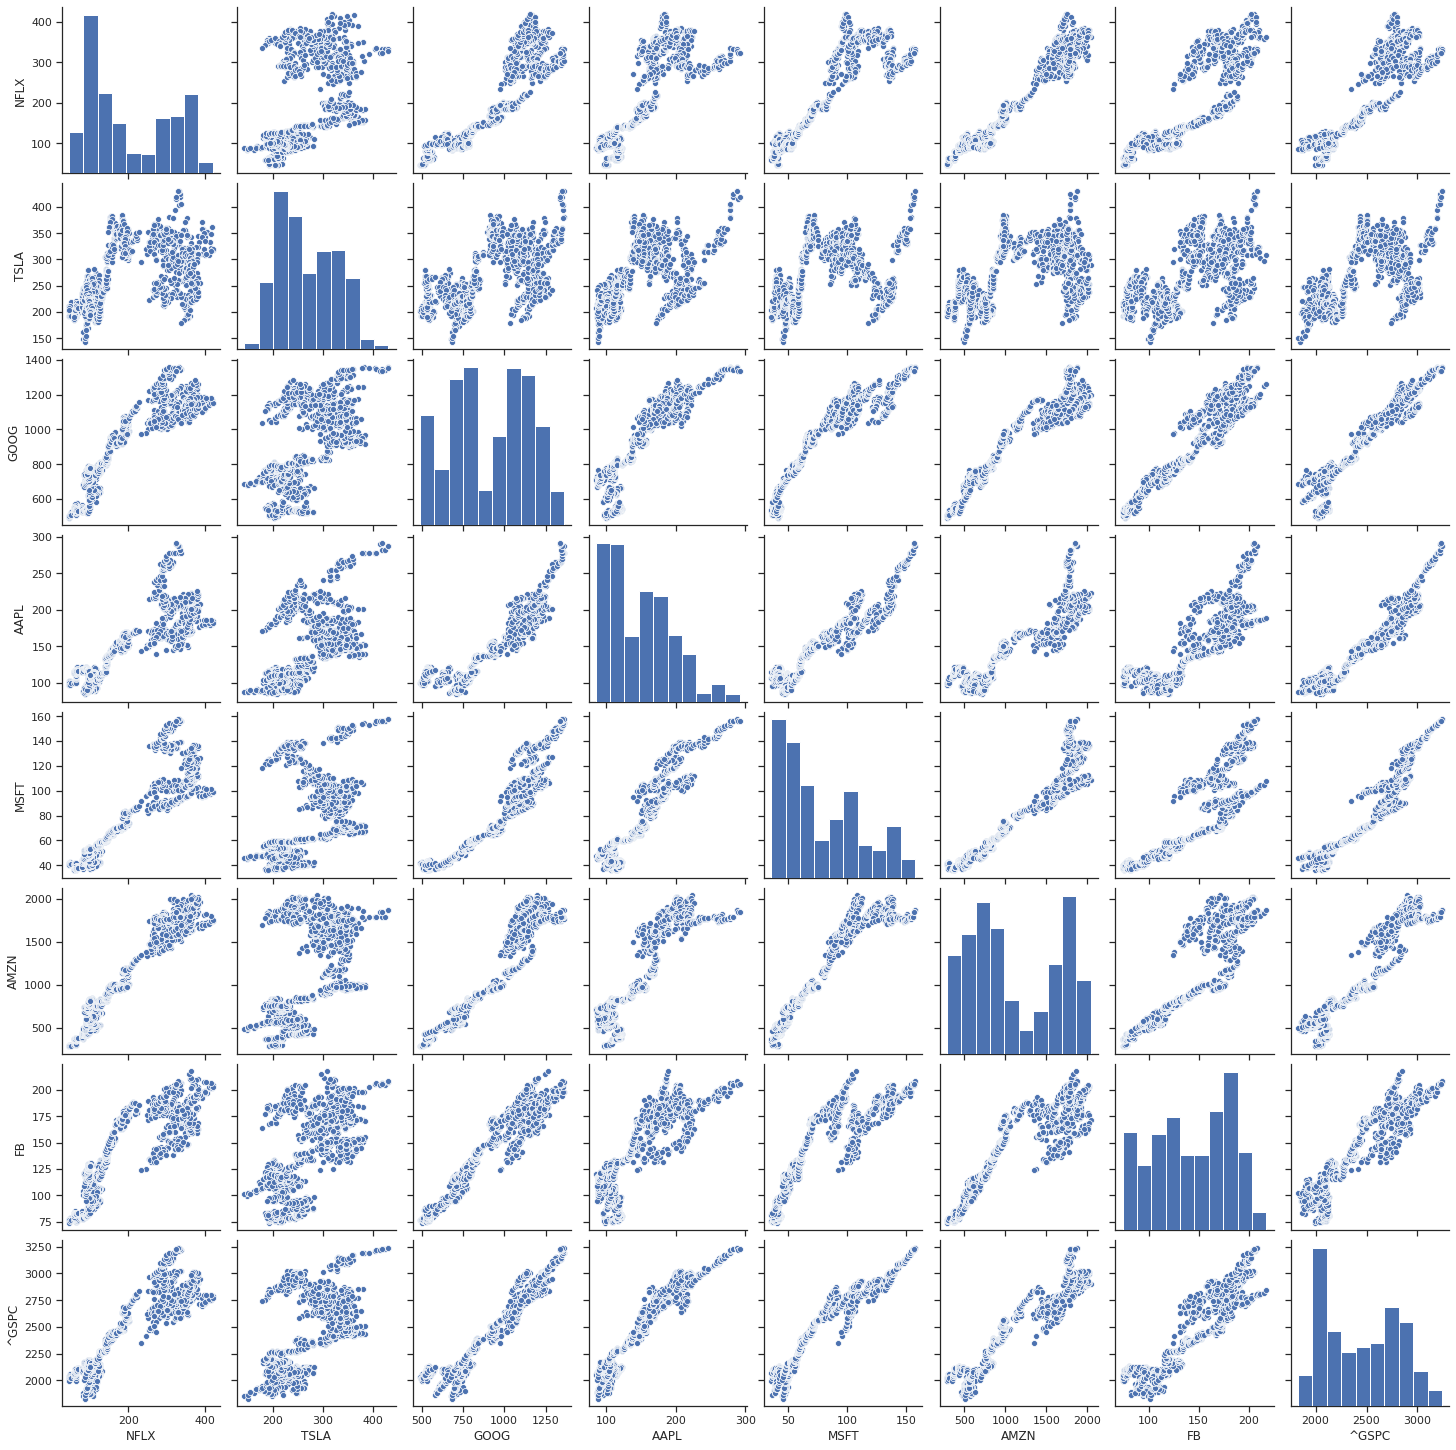

In [29]:
import seaborn as sns
sns.set(style='ticks')
sns.pairplot(adj_close_df)

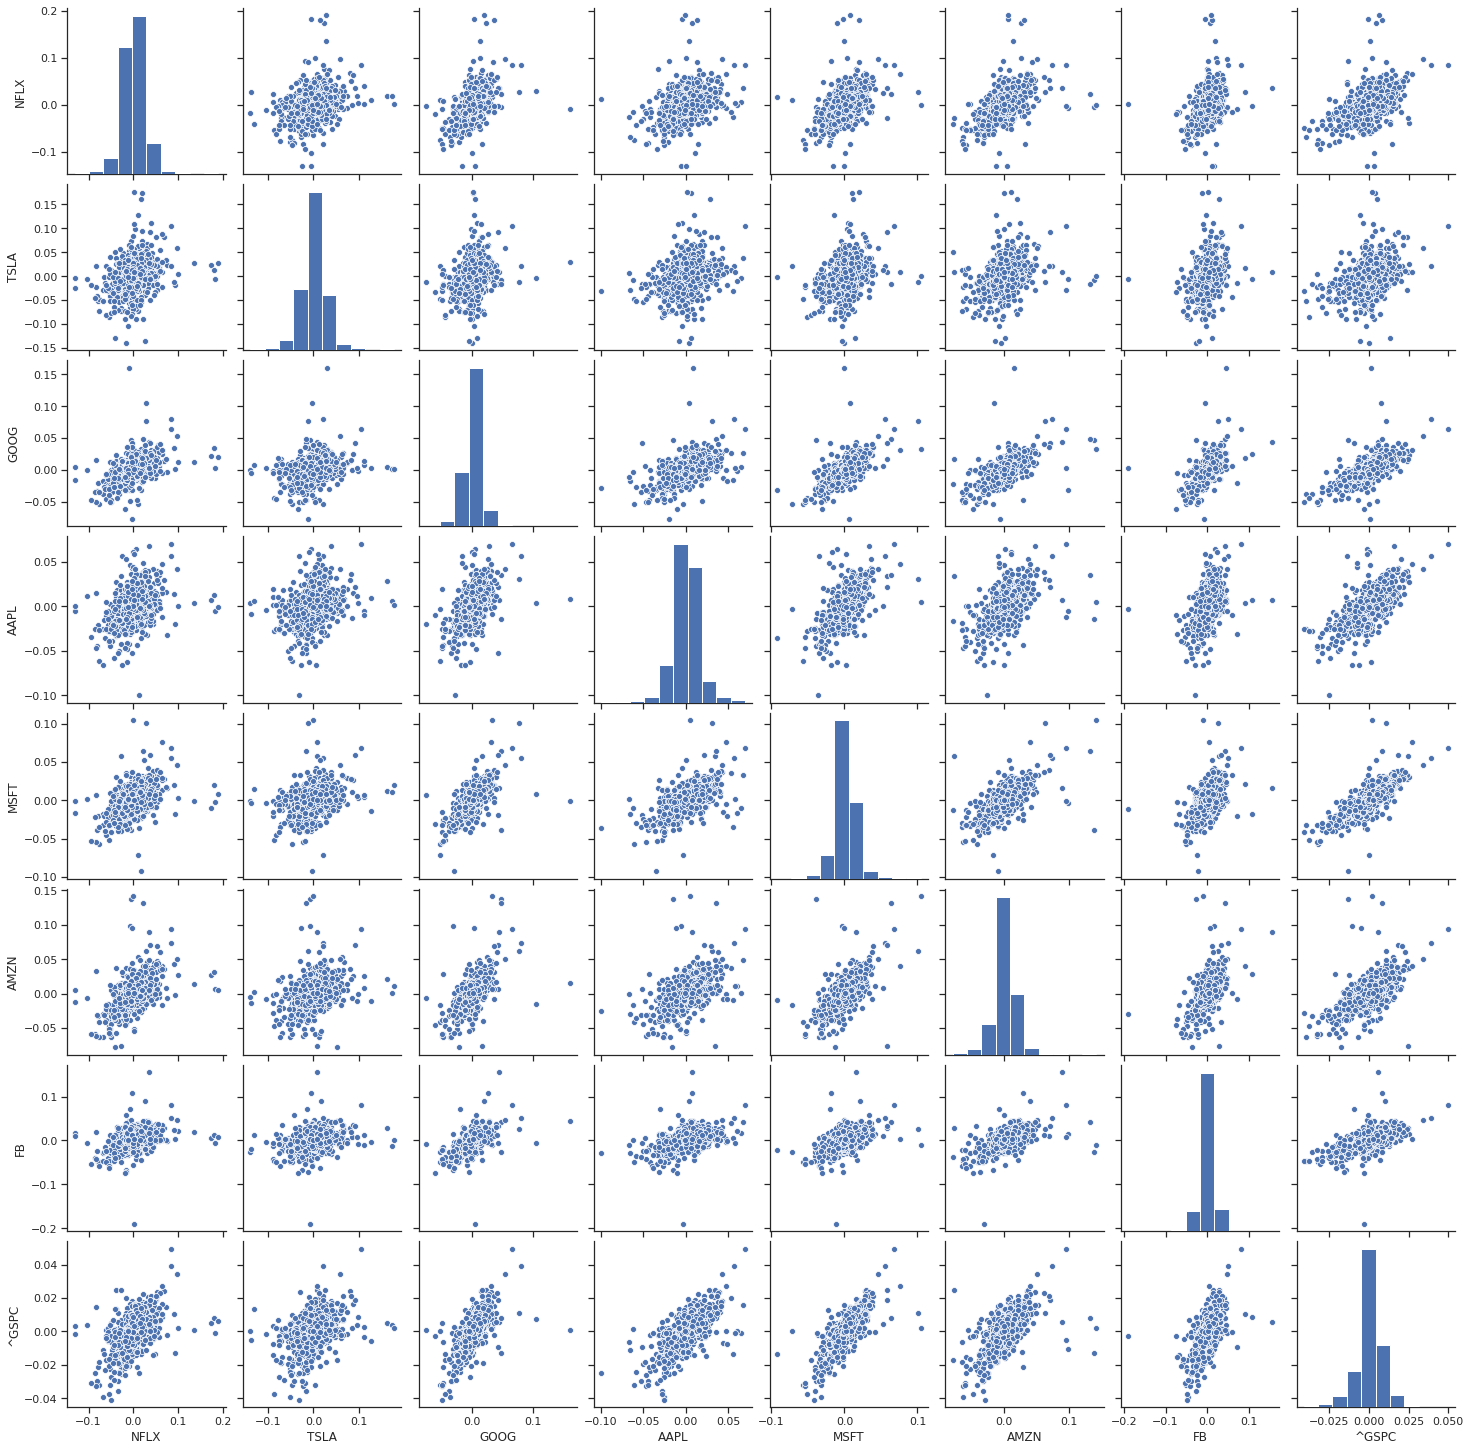

In [30]:
sns.pairplot(adj_close_pct_change)